In [33]:
### 모듈 IMPORT
import networkx as nx
import pandas as pd
import itertools
import markov_clustering as mc
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.asyn_fluid import asyn_fluidc
import networkx.algorithms.community.louvain as lvcm

In [2]:
tmp_data=pd.read_csv(r"C:\Users\moonp\ASAC과정\ASAC_ml_project\web_crawling\merge_dataset\tag_merge.csv")

In [3]:
tmp_data

,appid,Cartoon,Hunting,Time Management,Zombies,Isometric,Chess,Musou,Experimental,3D,...,360 Video,Linear,Grid-Based Movement,FMV,Lemmings,Tile-Matching,Indie,Arcade,Atmospheric,Cats
0,294100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1223.0,0.0,0.0,0.0
1,960090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0,...,0.0,0.0,0.0,0.0,0.0,0.0,161.0,0.0,0.0,0.0
2,504230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,887.0,0.0,320.0,0.0
3,588650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1003.0,0.0,3360.0,0.0
4,264710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1420.0,0.0,2618.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46718,1995280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46719,2098860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322.0,0.0
46720,2154770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46721,1915410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0


In [4]:
col_lst=list(tmp_data.columns)

In [5]:
tag_lst=[]
for i in range(len(tmp_data)):
    tmp=[]
    for j in col_lst:
        if tmp_data[j][i]!=0.0:
            tmp.append(j)
    tag_lst.append(tmp)
    if i %100==0:
        print(i)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [20]:
tmp_edge=itertools.combinations(tag_lst[0],2)
# edges.append(list(tmp_edge))
# start.append(edges[i][j][0])
# end.append(edges[i][j][1])

In [21]:
a=list(tmp_edge)
a[0][0]

'appid'

In [22]:
# tag_lst
edges=[]
start,end=[],[]
for i in range(len(tag_lst)):
    tmp_edge=itertools.combinations(tag_lst[i],2)
    edges=list(tmp_edge)
    for j in range(len(edges)):
        start.append(edges[j][0])
        end.append(edges[j][1])
    if i %100==0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [25]:
edge_weight=dict()
for i in range(len(start)):
    edge_weight[start[i]+";"+end[i]]=0
for i in range(len(start)):
    edge_weight[start[i]+";"+end[i]]+=1

In [26]:
tmp1=list(edge_weight.keys())
tmp2=list(edge_weight.values())

In [27]:
max(tmp2)

26614

In [47]:
G = nx.Graph()
for i in range(len(tmp1)):
    a=tmp1[i].split(";")
    G.add_edge(a[0],a[1],weight=tmp2[i]/26614*2)

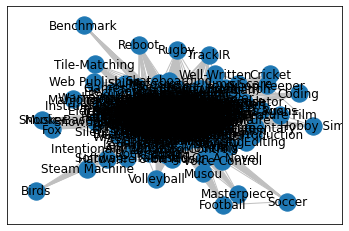

In [48]:
nx.draw_networkx(G,pos=nx.spring_layout(G),edge_color="silver")

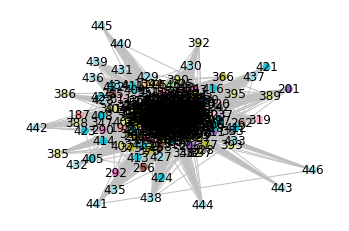

In [32]:
A2= nx.convert_matrix.to_scipy_sparse_array(G)
result2 = mc.run_mcl(A2)
clusters2 = mc.get_clusters(result2)
mc.draw_graph(A2, clusters2, node_size=50, with_labels=True, edge_color="silver")

In [53]:
def most_valuable_edge(g):
    return max(nx.edge_betweenness_centrality(g).items(), key=lambda x: x[1])[0]

comm = girvan_newman(G, most_valuable_edge=most_valuable_edge)

## girvan_newman으로 만든 iterator는 끝까지 가면 모두 1개 크기의 세트로 이루어진 커뮤니티 세트가 나옴 
for i, comms in enumerate(girvan_newman(G)):
    print('community set_{:0>2d}'.format(i))
    print("="*30)
    for i, c in enumerate(comms):
        print("community_{:0>2d}: {}".format(i, c))
    print("="*30)

KeyboardInterrupt: 

In [35]:
from networkx.algorithms.community.asyn_fluid import asyn_fluidc
if nx.is_connected(G): 
    for k in range(1,30):
        for i, community in enumerate(asyn_fluidc(G, k=k)):
            print("community_{:0>2d}: {}".format(i, community))
        print("="*40)
else:
    print("G가 not connected이면 실행안됨")

community_00: {'Boss Rush', 'Visual Novel', 'Basketball', 'Asynchronous Multiplayer', 'Football (American)', 'Vehicular Combat', 'Trains', 'Sailing', 'Economy', 'Experience', 'Underwater', 'Psychological Horror', 'Combat Racing', 'Turn-Based Tactics', 'Pool', 'Military', 'Procedural Generation', 'Ninja', 'Social Deduction', 'Tactical RPG', 'Battle Royale', 'Snooker', 'Point & Click', 'Warhammer 40K', 'Lore-Rich', 'Rock Music', 'Inventory Management', 'Well-Written', 'Massively Multiplayer', 'Hentai', 'Foreign', 'Perma Death', 'Retro', 'Transhumanism', 'Transportation', 'Loot', 'Spaceships', 'Cycling', 'Dark Comedy', 'Lovecraftian', 'Singleplayer', 'Female Protagonist', 'Immersive', 'Game Development', 'Crafting', 'Time Management', 'Western', 'Alternate History', 'Gore', 'Parkour', 'Grand Strategy', 'Tutorial', "Shoot 'Em Up", 'Diplomacy', 'Romance', 'Space Sim', 'Isometric', 'Instrumental Music', 'VR Only', 'Walking Simulator', 'Farming Sim', 'BMX', 'Idler', 'Sandbox', 'Sci-fi', 'Stra

In [36]:
""" Louvain method """
louv_com = lvcm.louvain_communities(G, weight='weight',seed=1234)
louv_part = lvcm.louvain_partitions(G, weight='weight',seed=1234)

In [38]:
len(louv_com)

5

In [40]:
from networkx.algorithms.community.quality import partition_quality

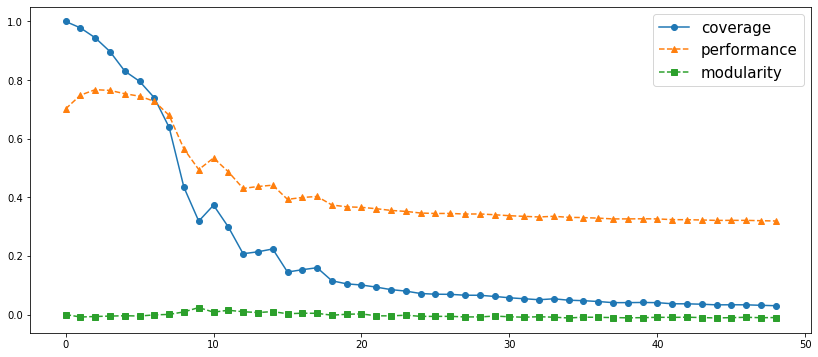

In [49]:
from networkx.algorithms.community.asyn_fluid import asyn_fluidc
from networkx.algorithms.community.quality import modularity
import matplotlib.pyplot as plt

coverage_lst, performance_lst, modularity_lst = [], [],[] 
for k in range(1, 50):
    communities = list(asyn_fluidc(G, k=k))
    coverage_lst.append(partition_quality(G, communities)[0] )
    performance_lst.append(partition_quality(G, communities)[1] )
    modularity_lst.append( modularity(G, communities) )
## 그림에서 보는 것처럼 performance가 충분히 높아지고 변화의 폭이 줄어들고 
## coverage가 충분히 큰 정도에서 멈추면 될듯함. 
## 따라서 적당한 k는 아마도 2-3 정도 
plt.figure(figsize=(14, 6))
plt.plot(coverage_lst, 'o-', label='coverage')
plt.plot(performance_lst, '^--', label='performance')
plt.plot(modularity_lst, 's--', label='modularity')
plt.legend(fontsize=15)
plt.show()

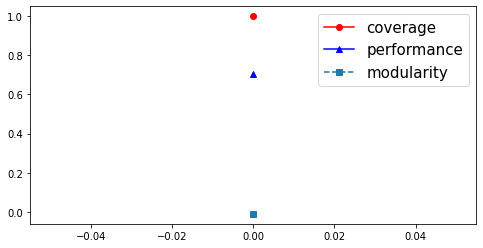

In [52]:
community_lst = [] ## 커뮤니티 리스트 
coverage_lst, performance_lst, modularity_lst = [], [],[] 
## 커뮤니티가 얼마나 잘 뽑혔는지를 평가하는 지표

for i, comms in enumerate(girvan_newman(G)):
    ## performance의 변화폭이 많이 적어지면 더이상 cluster를 나누어도 이득이 없으므로 멈춤
    if i!=0 and abs(partition_quality(G, comms)[1] - performance_lst[-1])< 0.01:
        break
    else:
        community_lst.append(comms), 
        coverage_lst.append(partition_quality(G, comms)[0]), performance_lst.append(partition_quality(G, comms)[1]),modularity_lst.append( modularity(G, communities) )

## performance, coverage의 값을 확인한 다음 
## performance의 변화 폭이 작고, coverage가 충분히 클 때까지 자름
plt.figure(figsize=(8, 4))
plt.plot(coverage_lst, label='coverage', marker='o', color='r')
plt.plot(performance_lst, marker='^', label='performance', color='b')
plt.plot(modularity_lst, 's--', label='modularity')
plt.legend(fontsize=15)
plt.show()

In [50]:
inflation_lst=[]
for i in range(11,30):
    inflation_lst.append(i/10)

In [51]:
for i in inflation_lst:
    result = mc.run_mcl(A2, inflation=i)
    clusters = mc.get_clusters(result)
    Q = mc.modularity(matrix=result, clusters=clusters)
    # mc.draw_graph(A2, clusters, node_size=50, with_labels=True, edge_color="silver")
    print("inflation:", i, "modularity:", Q, "Cluster Size : ",len(clusters))

inflation: 1.1 modularity: 0.25406763459103315 Cluster Size :  138
inflation: 1.2 modularity: 0.24127041324464862 Cluster Size :  263
inflation: 1.3 modularity: 0.19475098719276956 Cluster Size :  328
inflation: 1.4 modularity: 0.15357166093619398 Cluster Size :  362
inflation: 1.5 modularity: 0.12076032611143633 Cluster Size :  384
inflation: 1.6 modularity: 0.10762778453423018 Cluster Size :  392
inflation: 1.7 modularity: 0.09208794398650706 Cluster Size :  401
inflation: 1.8 modularity: 0.08127762012722152 Cluster Size :  407
inflation: 1.9 modularity: 0.07010695213929301 Cluster Size :  413
inflation: 2.0 modularity: 0.06630331967028517 Cluster Size :  415
inflation: 2.1 modularity: 0.06630331967028517 Cluster Size :  415
inflation: 2.2 modularity: 0.06052279927330604 Cluster Size :  418
inflation: 2.3 modularity: 0.06052279927330604 Cluster Size :  418
inflation: 2.4 modularity: 0.05857594002272174 Cluster Size :  419
inflation: 2.5 modularity: 0.05857594002272174 Cluster Size : 